In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
print(tf.__version__)

2.3.0


In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

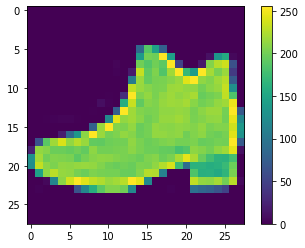

In [9]:
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images[0].shape

(28, 28)

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

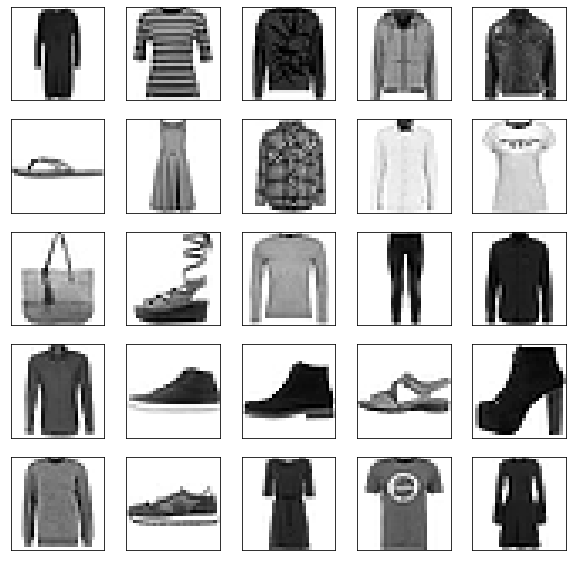

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i+25],cmap=plt.cm.binary)

In [13]:
#settinguplayers
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation="relu"),
                        keras.layers.Dense(10)
])

In [14]:
len(model.weights)

4

In [15]:
#model compile
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [16]:
#feed the model
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4976 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [18]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3290 - accuracy: 0.8869


In [17]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [19]:
predictions=probability_model.predict(test_images)

In [21]:
predictions.shape

(10000, 10)

In [23]:
predictions[0]

array([1.7203452e-07, 1.0466427e-08, 1.8198293e-06, 8.4139180e-07,
       2.9952050e-06, 7.8193229e-03, 9.0574292e-07, 3.0150836e-02,
       1.9909828e-06, 9.6202117e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
#plotting

In [44]:
def plot_image(i,pred_arr,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cmap.binary)
  pred_label=np.argmax(pred_arr)
  if true_label==pred_label:
    color="blue"
  else:
    color="red"
  plt.xlabel(str(class_names[pred_label])+str(np.round(100*np.max(pred_arr),2))+" ("+str(class_names[true_label])+")",color=color)

In [65]:
def plot_value_array(i,pred_array,true_label):
  true_label=true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  #pred_array=pred_array[i]
  pred_label=np.argmax(pred_array)
  thisplot=plt.bar(range(10),pred_array,color="#777777")
  plt.ylim([0,1]) 
  predicted_label=np.argmax(pred_array)
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")
  


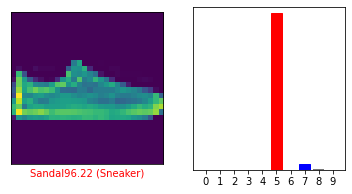

In [66]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

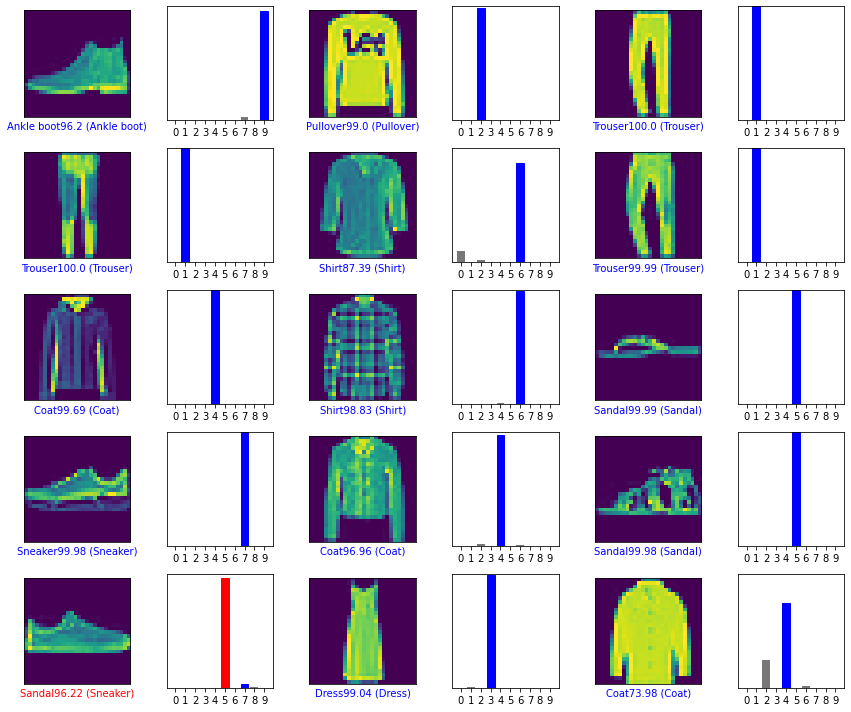

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()